In [1]:
%pylab inline
import pandas as pd
from pathlib import Path
import collections, itertools

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
firms = sorted(Path("output").glob('*'))
# just get latest for each firm
filings = [sorted(firm.glob('*.csv'))[-1:] for firm in firms]
filings = sorted(itertools.chain(*filings))
filings

[PosixPath('output/AQR/2022-05-16.csv'),
 PosixPath('output/Bluecrest/2022-05-16.csv'),
 PosixPath('output/Bridgewater/2022-05-13.csv'),
 PosixPath('output/Buffett/2022-05-16.csv'),
 PosixPath('output/DEShaw/2022-05-16.csv'),
 PosixPath('output/JPMorgan/2022-05-11.csv'),
 PosixPath('output/KYNIKOS ASSOCIATES LP/2020-11-16.csv'),
 PosixPath('output/Millenium/2022-05-16.csv'),
 PosixPath('output/Renaissance/2022-05-13.csv'),
 PosixPath('output/Scion Asset Management/2022-05-16.csv'),
 PosixPath('output/TwoSigma/2022-05-16.csv')]

In [3]:
# read all files

def read_csv(f):
    _, firm, date = str(f).split('.')[0].split('/')
    df = pd.read_csv(f).fillna('')
    df['date'] = pd.Timestamp(date)
    df['firm'] = firm
    return df

df = pd.concat([read_csv(f) for f in filings])
df

,NAME OF ISSUER,TITLE OF CLASS,CUSIP,VALUE (x$1000),SHRS OR PRN AMT,SH/ PRN,PUT/ CALL,INVESTMENT DISCRETION,OTHER MANAGER,VOTING AUTHORITY SOLE,VOTING AUTHORITY SHARED,VOTING AUTHORITY NONE,date,firm
0,1 800 FLOWERS COM INC,CL A,68243Q106,477,37421,SH,,DFND,,37421,0,0,2022-05-16,AQR
1,1ST SOURCE CORP,COM,336901103,2010,43457,SH,,DFND,,43457,0,0,2022-05-16,AQR
2,23ANDME HOLDING CO,CLASS A COM,90138Q108,91,23635,SH,,DFND,,23635,0,0,2022-05-16,AQR
3,2U INC,COM,90214J101,455,34575,SH,,DFND,,34575,0,0,2022-05-16,AQR
4,3M CO,COM,88579Y101,116940,785468,SH,,DFND,,459475,0,325993,2022-05-16,AQR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,ZURN WATER SOLUTIONS CORP,COM,98983L108,4188,118307,SH,,SOLE,,118307,0,0,2022-05-16,TwoSigma
2536,ZYMERGEN INC,COM,98985X100,881,304854,SH,,SOLE,,304854,0,0,2022-05-16,TwoSigma
2537,ZYMEWORKS INC,COM,98985W102,5182,791148,SH,,SOLE,,791148,0,0,2022-05-16,TwoSigma
2538,ZYNERBA PHARMACEUTICALS INC,COM,98986X109,221,107747,SH,,SOLE,,107747,0,0,2022-05-16,TwoSigma


In [4]:
df_puts = df[df["PUT/ CALL"]=="Put"]
df_puts

,NAME OF ISSUER,TITLE OF CLASS,CUSIP,VALUE (x$1000),SHRS OR PRN AMT,SH/ PRN,PUT/ CALL,INVESTMENT DISCRETION,OTHER MANAGER,VOTING AUTHORITY SOLE,VOTING AUTHORITY SHARED,VOTING AUTHORITY NONE,date,firm
73,DOMINION ENERGY INC,COM,25746U109,850,10000,SH,Put,OTR,,0,10000,0,2022-05-16,Bluecrest
119,INVESCO QQQ TR,UNIT SER 1,46090E103,258854,714000,SH,Put,OTR,,0,714000,0,2022-05-16,Bluecrest
123,ISHARES INC,MSCI BRAZIL ETF,464286400,8507,225000,SH,Put,OTR,,0,225000,0,2022-05-16,Bluecrest
128,ISHARES TR,CHINA LG-CAP ETF,464287184,1758,55000,SH,Put,OTR,,0,55000,0,2022-05-16,Bluecrest
131,ISHARES TR,IBOXX HI YD ETF,464288513,159840,1942400,SH,Put,OTR,,0,1942400,0,2022-05-16,Bluecrest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,STEM INC,COM,85859N102,826,75000,SH,Put,SOLE,,75000,0,0,2022-05-16,TwoSigma
2182,SUNNOVA ENERGY INTL INC.,COM,86745K104,6452,279800,SH,Put,SOLE,,279800,0,0,2022-05-16,TwoSigma
2202,T-MOBILE US INC,COM,872590104,73416,572000,SH,Put,SOLE,,572000,0,0,2022-05-16,TwoSigma
2380,VANECK ETF TRUST,SEMICONDUCTR ETF,92189F676,297,1100,SH,Put,SOLE,,1100,0,0,2022-05-16,TwoSigma


In [5]:
df_puts2 = df_puts[['date', 'firm', 'NAME OF ISSUER', 'VALUE (x$1000)']]
df_puts2

,date,firm,NAME OF ISSUER,VALUE (x$1000)
73,2022-05-16,Bluecrest,DOMINION ENERGY INC,850
119,2022-05-16,Bluecrest,INVESCO QQQ TR,258854
123,2022-05-16,Bluecrest,ISHARES INC,8507
128,2022-05-16,Bluecrest,ISHARES TR,1758
131,2022-05-16,Bluecrest,ISHARES TR,159840
...,...,...,...,...
2159,2022-05-16,TwoSigma,STEM INC,826
2182,2022-05-16,TwoSigma,SUNNOVA ENERGY INTL INC.,6452
2202,2022-05-16,TwoSigma,T-MOBILE US INC,73416
2380,2022-05-16,TwoSigma,VANECK ETF TRUST,297


In [6]:
from IPython.display import display

def display_more(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 20):
        display(df) #need display to show the dataframe when using with in jupyter
        #some pandas stuff


In [7]:
df_puts2.groupby(['firm', 'NAME OF ISSUER']).sum()

VALUE (x$1000)
firm      NAME OF ISSUER                              
Bluecrest DOMINION ENERGY INC                      850
          INVESCO QQQ TR                        258854
          ISHARES INC                             8507
          ISHARES TR                            394601
          SELECT SECTOR SPDR TR                  17121
...                                                ...
TwoSigma  STEM INC                                 826
          SUNNOVA ENERGY INTL INC.                6452
          T-MOBILE US INC                        73416
          VANECK ETF TRUST                         297
          VIRGIN GALACTIC HOLDINGS INC            5108

[1549 rows x 1 columns]

In [22]:
for name, g in df_puts2.groupby(['firm']):
    d = g.groupby('NAME OF ISSUER').agg({'VALUE (x$1000)':'sum', 'date':'first'}).sort_values('VALUE (x$1000)')
    print(name)
#     display(d.tail(10))
    print(d.tail(10).to_markdown())
    print()

Bluecrest
| NAME OF ISSUER               |   VALUE (x$1000) | date                |
|:-----------------------------|-----------------:|:--------------------|
| DOMINION ENERGY INC          |              850 | 2022-05-16 00:00:00 |
| SPDR INDEX SHS FDS           |             3123 | 2022-05-16 00:00:00 |
| VANGUARD INTL EQUITY INDEX F |             7281 | 2022-05-16 00:00:00 |
| ISHARES INC                  |             8507 | 2022-05-16 00:00:00 |
| SELECT SECTOR SPDR TR        |            17121 | 2022-05-16 00:00:00 |
| SPDR SER TR                  |            26262 | 2022-05-16 00:00:00 |
| SPDR GOLD TR                 |            28181 | 2022-05-16 00:00:00 |
| SPDR S&P 500 ETF TR          |           140370 | 2022-05-16 00:00:00 |
| INVESCO QQQ TR               |           258854 | 2022-05-16 00:00:00 |
| ISHARES TR                   |           394601 | 2022-05-16 00:00:00 |

DEShaw
| NAME OF ISSUER             |   VALUE (x$1000) | date                |
|:--------------------

In [9]:
puts = df_puts2.groupby(['NAME OF ISSUER']).sum()['VALUE (x$1000)'].sort_values()
display_more(puts.to_frame())

,VALUE (x$1000)
NAME OF ISSUER,
NEKTAR THERAPEUTICS,1
OPKO HEALTH INC,2
THE LION ELECTRIC COMPANY,3
NANO DIMENSION LTD,3
DUTCH BROS INC,6
HOUGHTON MIFFLIN HARCOURT CO,11
IMPINJ INC,13
BIOMARIN PHARMACEUTICAL INC,15
MP MATERIALS CORP,17


In [10]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 20):
    display(puts.to_frame())

,VALUE (x$1000)
NAME OF ISSUER,
NEKTAR THERAPEUTICS,1
OPKO HEALTH INC,2
THE LION ELECTRIC COMPANY,3
NANO DIMENSION LTD,3
DUTCH BROS INC,6
...,...
APPLE INC,5995235
TESLA INC,9093165
INVESCO QQQ TR,10416101


<AxesSubplot:ylabel='VALUE (x$1000)'>

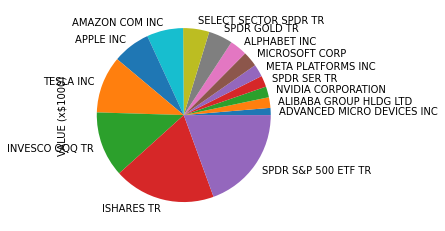

In [23]:
puts.tail(15).plot.pie()